# Preprocessing Delhi House Price Prediction Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("MagicBricks.csv")
df.head()

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price
0,3,2.0,1.0,800.0,NaN,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Rohini Sector 25,6500000
1,2,2.0,1.0,750.0,6667.0,Semi-Furnished,Ready_to_move,New_Property,Apartment,"J R Designers Floors, Rohini Sector 24",5000000
2,2,2.0,1.0,950.0,6667.0,Furnished,Ready_to_move,Resale,Apartment,"Citizen Apartment, Rohini Sector 13",15500000
3,2,2.0,1.0,600.0,6667.0,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,Rohini Sector 24,4200000
4,2,2.0,1.0,650.0,6667.0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Rohini Sector 24 carpet area 650 sqft status R...,6200000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BHK          1259 non-null   int64  
 1   Bathroom     1257 non-null   float64
 2   Parking      1226 non-null   float64
 3   Area         1259 non-null   float64
 4   Per_Sqft     1018 non-null   float64
 5   Furnishing   1254 non-null   object 
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
 9   Locality     1259 non-null   object 
 10  Price        1259 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [4]:
df.isnull().sum()

BHK              0
Bathroom         2
Parking         33
Area             0
Per_Sqft       241
Furnishing       5
Status           0
Transaction      0
Type             5
Locality         0
Price            0
dtype: int64

In [5]:
df.shape

(1259, 11)

In [6]:
# Convert Price to Lakh Rupees by dividing by 100000
df["Price"] = (df["Price"]/100000).round(3)
df.head()

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price
0,3,2.0,1.0,800.0,NaN,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Rohini Sector 25,65.0
1,2,2.0,1.0,750.0,6667.0,Semi-Furnished,Ready_to_move,New_Property,Apartment,"J R Designers Floors, Rohini Sector 24",50.0
2,2,2.0,1.0,950.0,6667.0,Furnished,Ready_to_move,Resale,Apartment,"Citizen Apartment, Rohini Sector 13",155.0
3,2,2.0,1.0,600.0,6667.0,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,Rohini Sector 24,42.0
4,2,2.0,1.0,650.0,6667.0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Rohini Sector 24 carpet area 650 sqft status R...,62.0


In [7]:
# Selecting duplicate rows based on first occurence based on all columns
duplicate = df[df.duplicated()]
duplicate

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price
84,3,3.0,1.0,1540.0,3524.0,Semi-Furnished,Ready_to_move,Resale,Apartment,"Nav Kairali Apartment, Dwarka Sector 3",145.0
92,3,3.0,2.0,1450.0,NaN,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Lajpat Nagar 3,300.0
110,2,2.0,1.0,1000.0,20000.0,Furnished,Ready_to_move,Resale,Apartment,Lajpat Nagar 3,200.0
120,1,NaN,NaN,1500.0,NaN,Unfurnished,Ready_to_move,Resale,Apartment,Lajpat Nagar 2,135.0
122,3,3.0,4.0,1710.0,NaN,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Lajpat Nagar 2,260.0
...,...,...,...,...,...,...,...,...,...,...,...
1164,2,2.0,1.0,1300.0,11538.0,Semi-Furnished,Ready_to_move,Resale,Apartment,"Yamuna Apartment, Alaknanda",150.0
1165,2,2.0,1.0,1200.0,11538.0,Unfurnished,Ready_to_move,Resale,Apartment,"Nilgiri Apartment, Alaknanda",143.0
1166,3,2.0,1.0,1300.0,11538.0,Unfurnished,Ready_to_move,Resale,Apartment,"Nilgiri Apartment, Alaknanda",185.0
1167,3,3.0,1.0,1400.0,11538.0,Furnished,Ready_to_move,Resale,Apartment,"Tara Apartment, Alaknanda carpet area 1400 sqf...",190.0


In [8]:
# Drop the above 83 duplicate rows
housing=df.drop_duplicates()
housing.shape

(1176, 11)

## Exploratory Data Analysis

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Analysis of Numerical Data

In [10]:
correlation=housing.corr()
correlation

,BHK,Bathroom,Parking,Area,Per_Sqft,Price
BHK,1.000000,0.771053,-0.072551,0.461125,0.179493,0.566039
Bathroom,0.771053,1.000000,-0.035055,0.554409,0.217231,0.731663
Parking,-0.072551,-0.035055,1.000000,-0.010964,-0.000116,-0.001833
Area,0.461125,0.554409,-0.010964,1.000000,0.161889,0.602679
Per_Sqft,0.179493,0.217231,-0.000116,0.161889,1.000000,0.323747
Price,0.566039,0.731663,-0.001833,0.602679,0.323747,1.000000


In [11]:
correlation["Price"].sort_values(ascending=False)

Price       1.000000
Bathroom    0.731663
Area        0.602679
BHK         0.566039
Per_Sqft    0.323747
Parking    -0.001833
Name: Price, dtype: float64

Missing values in BHK Column:  0
BHK            1174
Bathroom       1173
Parking        1143
Area           1174
Per_Sqft        948
Furnishing     1169
Status         1174
Transaction    1174
Type           1169
Locality       1174
Price          1174
dtype: int64


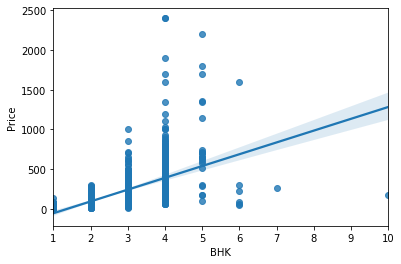

In [12]:
# Exploring BHK feature
sns.regplot(x="BHK",y="Price",data=housing)
print("Missing values in BHK Column: ",housing["BHK"].isnull().sum())
print(housing[housing["BHK"]<=6].count())
# Here 1174/1176 rows have Area less than equal to 6BHK

Missing values in Bathroom Column:  1
BHK            1166
Bathroom       1166
Parking        1137
Area           1166
Per_Sqft        940
Furnishing     1161
Status         1166
Transaction    1166
Type           1161
Locality       1166
Price          1166
dtype: int64


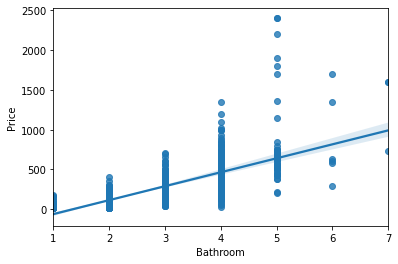

In [13]:
# Exploring Bathroom feature
sns.regplot(x="Bathroom",y="Price",data=housing)
print("Missing values in Bathroom Column: " ,housing["Bathroom"].isnull().sum())
print(housing[housing["Bathroom"]<=5].count())
# Here 1166/1176 rows have Area less than equal to 5 Bathrooms

Missing values in Parking Column:  31
BHK            1133
Bathroom       1133
Parking        1133
Area           1133
Per_Sqft        927
Furnishing     1132
Status         1133
Transaction    1133
Type           1132
Locality       1133
Price          1133
dtype: int64


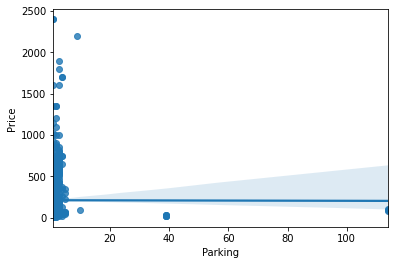

In [14]:
# Exploring Parking feature
sns.regplot(x="Parking",y="Price",data=housing)
print("Missing values in Parking Column: " ,housing["Parking"].isnull().sum())
print(housing[housing["Parking"]<=5].count())
# Here 1133/1176 rows have Area less than equal to 5 Parkings

c:\users\shala\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parking', ylabel='count'>

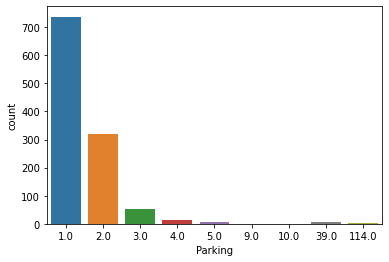

In [15]:
sns.countplot(housing["Parking"])

Missing values in Area Column:  0
BHK            1112
Bathroom       1111
Parking        1082
Area           1112
Per_Sqft        889
Furnishing     1107
Status         1112
Transaction    1112
Type           1107
Locality       1112
Price          1112
dtype: int64


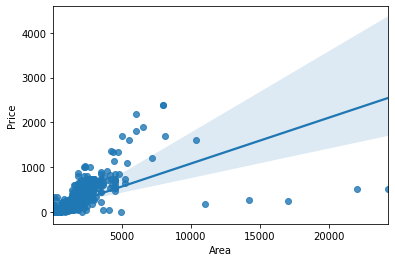

In [16]:
# Exploring Area feature
sns.regplot(x="Area",y="Price",data=housing)
print("Missing values in Area Column: " ,housing["Area"].isnull().sum())
print(housing[housing["Area"]<=3000].count())
# Here 1174/1176 rows have Area less than equal to 3000

### Analysis of Categorical Data

In [17]:
# Exploring Transaction feature
print("Missing values in Transaction Column: " ,housing["Transaction"].isnull().sum())
housing["Transaction"].value_counts()

Missing values in Transaction Column:  0


Resale          741
New_Property    435
Name: Transaction, dtype: int64

In [18]:
# Exploring Status feature
print("Missing values in Status Column: " ,housing["Status"].isnull().sum())
housing["Status"].value_counts()

Missing values in Status Column:  0


Ready_to_move    1115
Almost_ready       61
Name: Status, dtype: int64

In [19]:
# Exploring Furnishing feature
print("Missing values in Furnishing Column: " ,housing["Furnishing"].isnull().sum())
housing["Furnishing"].value_counts()

Missing values in Furnishing Column:  5


Semi-Furnished    667
Unfurnished       330
Furnished         174
Name: Furnishing, dtype: int64

In [20]:
# Exploring Type feature
print("Missing values in Type Column: " ,housing["Type"].isnull().sum())
housing["Type"].value_counts()

Missing values in Type Column:  5


Builder_Floor    643
Apartment        528
Name: Type, dtype: int64

In [21]:
# Exploring Locality feature
print("Missing values in Locality Column: ",housing["Locality"].isnull().sum())
print("Unique values in Locality", housing["Locality"].nunique())
housing["Locality"].value_counts()

Missing values in Locality Column:  0
Unique values in Locality 365


Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  32
Kailash Colony, Greater Kailash                                                                                                                                                                                                                                                                                      

In [22]:
print("Missing values in Per_Sqft Column: ",housing["Per_Sqft"].isnull().sum())

Missing values in Per_Sqft Column:  227


### Dealing with missing values

In [23]:
bathroom_median = housing["Bathroom"].median()
housing["Bathroom"].fillna(value=bathroom_median, inplace=True)
#housing["Bathroom"]=housing["Bathroom"].fillna(value=bathroom_median)

c:\users\shala\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
housing[housing['Bathroom'].isnull()]

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price


In [25]:
# Per_Sqft has over 200 missing values
compare = (housing['Price']/housing['Area'])-housing['Per_Sqft']
compare.median()

-11110.777777777777

In [26]:
# Use (housing['Price']/housing['Area']) to fill null values in Per_Sqft column
housing["Per_Sqft"].fillna(value=(housing['Price']/housing['Area']),inplace=True)


c:\users\shala\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
housing[housing['Per_Sqft'].isnull()]

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price


In [28]:
# Type and Furnishing are categorical data so median is not used here
# sort the dataframe based on Locality and use method='bfill' to fill null values
housing.sort_values(by="Locality",axis=0,inplace=True)
housing

<ipython-input-28-ba10c7408607>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.sort_values(by="Locality",axis=0,inplace=True)


,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price
222,4,3.0,1.0,2700.0,22222.000000,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,"APL Builder Floor, Greater Kailash 1",600.0
637,3,2.0,1.0,1550.0,0.085161,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",132.0
651,3,3.0,1.0,1700.0,0.101176,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",172.0
648,3,2.0,1.0,1380.0,0.108696,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",150.0
645,3,2.0,1.0,1850.0,0.083784,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",155.0
...,...,...,...,...,...,...,...,...,...,...,...
329,3,2.0,1.0,810.0,0.074074,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,"Yamuna Vihar, Shahdara",60.0
331,2,1.0,1.0,540.0,5000.000000,Furnished,Ready_to_move,New_Property,Apartment,"Yamuna Vihar, Shahdara",27.0
341,1,2.0,1.0,70.0,5357.000000,Unfurnished,Ready_to_move,Resale,Apartment,"Yamuna Vihar, Shahdara",45.0
1010,2,1.0,2.0,540.0,2778.000000,Unfurnished,Ready_to_move,Resale,Builder_Floor,"Zakir Nagar, New Friends Colony",15.0


In [29]:
housing["Type"].fillna(method='bfill', inplace=True)
housing["Furnishing"].fillna(method='bfill', inplace=True)

c:\users\shala\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
housing[housing['Type'].isnull()]

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price


In [31]:
housing[housing['Furnishing'].isnull()]

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price


In [32]:
# Parking
mode_ = housing["Parking"].mode()
print(mode_)
housing["Parking"].fillna(value=mode_[0], inplace=True)

0    1.0
dtype: float64


c:\users\shala\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
housing[housing['Parking'].isnull()]

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price


In [34]:
housing.isnull().sum()

BHK            0
Bathroom       0
Parking        0
Area           0
Per_Sqft       0
Furnishing     0
Status         0
Transaction    0
Type           0
Locality       0
Price          0
dtype: int64

In [35]:
housing.head(100)
# need to perform encoding on Furnishing, Status, Transaction, Type, Locality

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price
222,4,3.0,1.0,2700.0,22222.000000,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,"APL Builder Floor, Greater Kailash 1",600.0
637,3,2.0,1.0,1550.0,0.085161,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",132.0
651,3,3.0,1.0,1700.0,0.101176,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",172.0
648,3,2.0,1.0,1380.0,0.108696,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",150.0
645,3,2.0,1.0,1850.0,0.083784,Semi-Furnished,Ready_to_move,Resale,Apartment,"Aashirwaad Chowk, Dwarka",155.0
...,...,...,...,...,...,...,...,...,...,...,...
787,2,2.0,1.0,675.0,0.041481,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Chhattarpur,28.0
798,3,2.0,1.0,950.0,4138.000000,Semi-Furnished,Almost_ready,New_Property,Builder_Floor,Chhattarpur,70.2
790,2,2.0,4.0,810.0,0.055556,Unfurnished,Ready_to_move,Resale,Apartment,Chhattarpur,45.0
800,2,2.0,1.0,900.0,4138.000000,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,Chhattarpur,35.0


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
Furnishing_encoder = LabelEncoder()
Status_encoder = LabelEncoder()
Transaction_encoder = LabelEncoder()
Type_encoder = LabelEncoder()

In [38]:
housing["Furnishing"] = Furnishing_encoder.fit_transform(housing["Furnishing"].astype(str))
housing["Status"] = Status_encoder.fit_transform(housing["Status"])
housing["Transaction"] = Transaction_encoder.fit_transform(housing["Transaction"])
housing["Type"] = Type_encoder.fit_transform(housing["Type"])

<ipython-input-38-89bf41a82271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["Furnishing"] = Furnishing_encoder.fit_transform(housing["Furnishing"].astype(str))
<ipython-input-38-89bf41a82271>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing["Status"] = Status_encoder.fit_transform(housing["Status"])
<ipython-input-38-89bf41a82271>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [39]:
housing.head(200)

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Locality,Price
222,4,3.0,1.0,2700.0,22222.000000,1,1,0,1,"APL Builder Floor, Greater Kailash 1",600.0
637,3,2.0,1.0,1550.0,0.085161,1,1,1,0,"Aashirwaad Chowk, Dwarka",132.0
651,3,3.0,1.0,1700.0,0.101176,1,1,1,0,"Aashirwaad Chowk, Dwarka",172.0
648,3,2.0,1.0,1380.0,0.108696,1,1,1,0,"Aashirwaad Chowk, Dwarka",150.0
645,3,2.0,1.0,1850.0,0.083784,1,1,1,0,"Aashirwaad Chowk, Dwarka",155.0
...,...,...,...,...,...,...,...,...,...,...,...
733,2,2.0,2.0,950.0,0.133684,0,1,1,0,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",127.0
729,4,2.0,2.0,1550.0,0.112903,0,1,1,0,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",175.0
726,4,2.0,2.0,1400.0,0.127143,0,1,1,0,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",178.0
725,3,3.0,2.0,1200.0,0.112500,0,1,1,0,"DDA Flats Sarita Vihar, Sarita Vihar, Mathura ...",135.0


In [40]:
Locality_value_count = housing['Locality'].value_counts()
Locality_value_count

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  32
Kailash Colony, Greater Kailash                                                                                                                                                                                                                                                                                      

In [41]:
Locality_365 = Locality_value_count[Locality_value_count>=1].index
Locality_365

Index(['Lajpat Nagar 3', 'Kailash Colony, Greater Kailash', 'Lajpat Nagar 2',
       'Yamuna Vihar, Shahdara', 'J R Designers Floors, Rohini Sector 24',
       'Mehrauli', 'Chittaranjan Park', 'Laxmi Nagar', 'Saket',
       'DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road',
       ...
       'New Uttam Nagar, Uttam Nagar', 'Dwarka Sector 4',
       'Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas',
       'Safdarjung Enclave carpet area 290 sqyrd status Ready to Move floor 2 out of 3 floors transaction Resale furnishing Semi-Furnished facing West overlooking Main Road car parking 2 Open bathroom 4 balcony 3 ownership Freehold Opposite Deer Park.The property comes with independent Terrace. The area is centrally located and close to ring road which allows easy acess to all other areas.Renowned Delhi Lawn Tennis Association is within 10 minutes walking distance.Green park market is walkable distance. read more Contact Owner View Phone No. Share Feedback Owner Hemant pajankar',
      

In [42]:
# Locality count is greter than 1 then  create column of that feature 
# Next if this Locality is present in Locality feature then set value to 1 or else 0 ( ohe hot encoding)
housing_copy = housing.copy()
for i,cat_var in enumerate(Locality_365):
    # make new column with Locality+str(i)
    housing_copy['Locality_'+cat_var]=np.where(housing_copy['Locality']==cat_var, 1,0)
housing_copy.shape

(1176, 376)

In [43]:
housing_copy.drop(["Locality"],axis=1,inplace=True)
housing_copy.head()

,BHK,Bathroom,Parking,Area,Per_Sqft,Furnishing,Status,Transaction,Type,Price,...,"Locality_New Uttam Nagar, Uttam Nagar",Locality_Dwarka Sector 4,"Locality_Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas",Locality_Safdarjung Enclave carpet area 290 sqyrd status Ready to Move floor 2 out of 3 floors transaction Resale furnishing Semi-Furnished facing West overlooking Main Road car parking 2 Open bathroom 4 balcony 3 ownership Freehold Opposite Deer Park.The property comes with independent Terrace. The area is centrally located and close to ring road which allows easy acess to all other areas.Renowned Delhi Lawn Tennis Association is within 10 minutes walking distance.Green park market is walkable distance. read more Contact Owner View Phone No. Share Feedback Owner Hemant pajankar,"Locality_DDA Flats, Sarita Vihar, Mathura Road carpet area 1150 sqft status Ready to Move floor 3 out of 3 floors transaction Resale furnishing Semi-Furnished facing North - East overlooking Main Road society DDA Flats car parking 2 Open bathroom 2 balcony 3 ownership Freehold 2 BHK flat available for sale in sarita vihar excellent interiors flooring in all bedrooms complete wood work modular kitchen beautiful bathrooms extremely well maintained ample parking space read more Contact Agent View Phone No. Share Feedback Lavish Associates Certified Agent Trusted by Users Genuine Listings Market Knowledge","Locality_Sarita Vihar, Mathura Road carpet area 1500 sqft status Ready to Move floor 2 out of 4 floors transaction Resale ownership Freehold overlooking Main Road car parking 1 Open bathroom 2 balcony 2 furnishing Unfurnished For sale second third duplex .spacious 3 bedrooms with 2 washrooms drawing and dining and moduler kitchen one scooter garrage. read more Contact Agent View Phone No. Share Feedback Shree Balaji Real Estate Pvt. Ltd. Has Maximum Property Options Is the Top Agent of the Locality Is Trusted by All Users 21 Property Options in Sarita Vihar, Mathura Road Shree Balaji Real Estate Pvt. Ltd. Certified Agent Locality Superstar Maximum options in Sarita Vihar, Mathura Road","Locality_Rohitash Nagar East, Shahdara","Locality_Adarsh Homes, Dwarka Mor",Locality_Sarita Vihar Pocket B,"Locality_Gangotri Enclave, Alaknanda"
222,4,3.0,1.0,2700.0,22222.000000,1,1,0,1,600.0,...,0,0,0,0,0,0,0,0,0,0
637,3,2.0,1.0,1550.0,0.085161,1,1,1,0,132.0,...,0,0,0,0,0,0,0,0,0,0
651,3,3.0,1.0,1700.0,0.101176,1,1,1,0,172.0,...,0,0,0,0,0,0,0,0,0,0
648,3,2.0,1.0,1380.0,0.108696,1,1,1,0,150.0,...,0,0,0,0,0,0,0,0,0,0
645,3,2.0,1.0,1850.0,0.083784,1,1,1,0,155.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
housing_copy.to_csv("ReadytoUse.csv",index=False)